# Importación de librerías

In [1]:
import gdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import seaborn.objects as so

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer,make_column_selector
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier

from sklearn.metrics import auc, classification_report, confusion_matrix, roc_curve, RocCurveDisplay, accuracy_score, balanced_accuracy_score, log_loss

In [2]:
mpl.rcParams['savefig.format'] = 'svg'

## Pregunta 1: Selección y descarga de dataset


### Dataset

Hemos elegido el dataset de "Obesity Levels" disponible en Kaggle, que se puede encontrar en el siguiente enlace: [Obesity Levels Dataset](https://www.kaggle.com/datasets/fatemehmehrparvar/obesity-levels)

### Descripción del dataset

El dataset "Obesity Levels" contiene información sobre varios factores relacionados con la obesidad. Las columnas del dataset incluyen tanto datos numéricos como categóricos. La información contenida en el dataset incluye datos demográficos y de estilo de vida de los individuos, como la frecuencia del consumo de alimentos, la actividad física y otros hábitos que pueden influir en el nivel de obesidad.

Columnas del dataset:
- Gender: Género del individuo (categórico).
- Age: Edad del individuo (numérico).
- Height: Altura del individuo en metros (numérico).
- Weight: Peso del individuo en kilogramos (numérico).
- family_history_with_overweight: Historial familiar de sobrepeso (categórico).
- FAVC: Frecuencia del consumo de alimentos grasos (categórico).
- FCVC: Frecuencia del consumo de vegetales (numérico).
- NCP: Número de comidas principales al día (numérico).
- CAEC: Consumo de alimentos entre comidas (categórico).
- SMOKE: Fuma o no (categórico).
- CH2O: Consumo diario de agua (numérico).
- SCC: Monitorea las calorías que consume (categórico).
- FAF: Frecuencia de actividad física por semana (numérico).
- TUE: Tiempo de uso de dispositivos electrónicos por día (numérico).
- CALC: Frecuencia del consumo de alcohol (categórico).
- MTRANS: Medio de transporte que utiliza (categórico).
- NObeyesdad: Nivel de obesidad (categórico, y será la columna a predecir).


### Que queremos predecir

La tarea de predicción que realizaremos es clasificar el nivel de obesidad del individuo en función de las características proporcionadas. La columna a predecir es NObeyesdad, que contiene la clasificación del nivel de obesidad.

### Descarga del dataset

In [3]:
url = 'https://drive.google.com/uc?id=1l-ywysTBLSfLZN3oNhbd7ihyjAP7Xdek'

output = 'obesity_levels.csv'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1l-ywysTBLSfLZN3oNhbd7ihyjAP7Xdek
To: /content/obesity_levels.csv
100%|██████████| 264k/264k [00:00<00:00, 5.88MB/s]


'obesity_levels.csv'

## Pregunta 2: Análisis de columnas


### Cargar dataset

In [4]:
df = pd.read_csv('obesity_levels.csv')
df.shape

(2111, 17)

#### Visualización de dataset

In [5]:
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


#### Descripción de los datos

In [6]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


#### Visualización de info

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

Al revisar el dataset, nos dimos cuenta de que la columna Age tiene valores de edades flotantes, lo cual es inconsistente con la mayor parte de los datos (ejemplo: 21.34 años de edad), lo mismo ocurre con otras columnas como CH2O, FAF, ....etc. Por lo tanto, procedimos a convertir las columnas flotantes en enteros, a excepción de Height y Weight.

In [8]:
for column in df.columns:
    if df[column].dtype == "float64" and column != "Height" and column != "Weight":
        df[column]=df[column].astype(int)

In [9]:
df

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.620000,64.000000,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.520000,56.000000,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.800000,77.000000,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.800000,87.000000,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.780000,89.800000,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20,Female,1.710730,131.408528,Sometimes,yes,3,3,no,no,1,yes,1,0,Sometimes,Public_Transportation,Obesity_Type_III
2107,21,Female,1.748584,133.742943,Sometimes,yes,3,3,no,no,2,yes,1,0,Sometimes,Public_Transportation,Obesity_Type_III
2108,22,Female,1.752206,133.689352,Sometimes,yes,3,3,no,no,2,yes,1,0,Sometimes,Public_Transportation,Obesity_Type_III
2109,24,Female,1.739450,133.346641,Sometimes,yes,3,3,no,no,2,yes,1,0,Sometimes,Public_Transportation,Obesity_Type_III


#### Visualizando la data

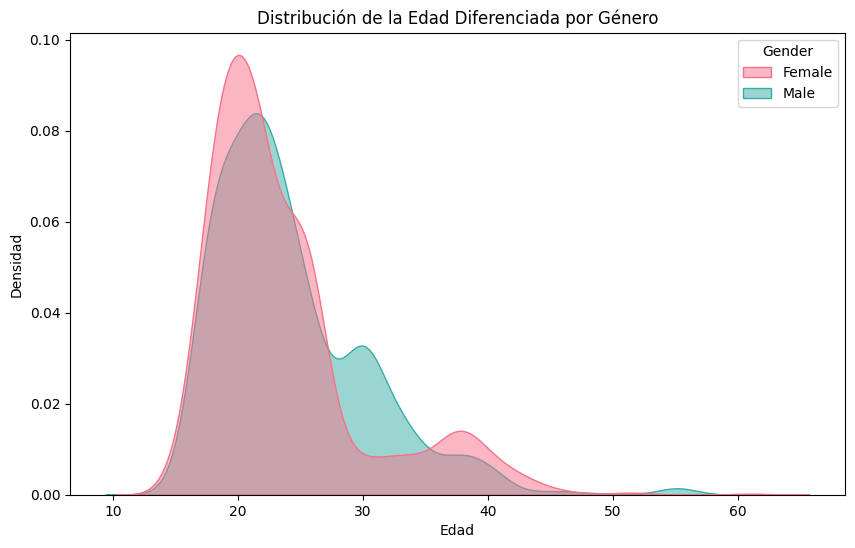

In [10]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Age', hue='Gender', fill=True, common_norm=False, palette='husl', alpha=0.5)
plt.title('Distribución de la Edad Diferenciada por Género')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.show()

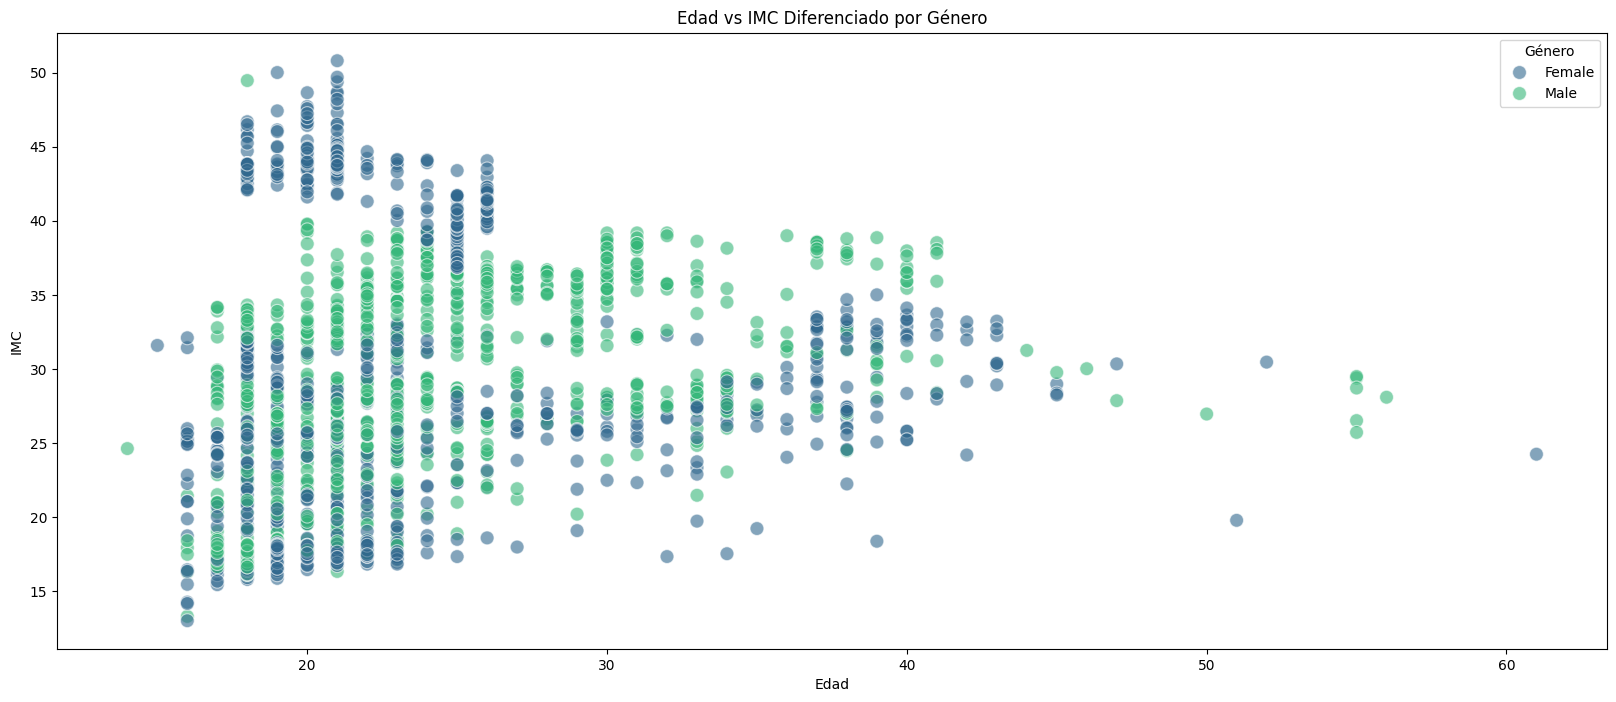

In [11]:
# Cálculo del IMC (Índice de Masa Corporal)
df['BMI'] = df['Weight'] / (df['Height'] ** 2)

plt.figure(figsize=(20, 8))
sns.scatterplot(x='Age', y='BMI', hue='Gender', data=df, palette='viridis',  s=100, alpha=0.6)
plt.title('Edad vs IMC Diferenciado por Género')
plt.xlabel('Edad')
plt.ylabel('IMC')
plt.legend(title='Género')
plt.show()

**Conclusión del Gráfico**

Aunque la distribución de los puntos es similar entre hombres y mujeres, se observa que las mujeres entre 17 y 26 años tienden a tener un IMC mayor que los hombres en el mismo rango de edad. Esto podría ser un punto de interés.

Por otro lado la alta concentración de individuos con un IMC en el rango de 30-40 podría indicar un problema común de sobrepeso en la población analizada, sugiriendo que la mayoría de las personas en esta muestra tienden a tener sobrepeso.

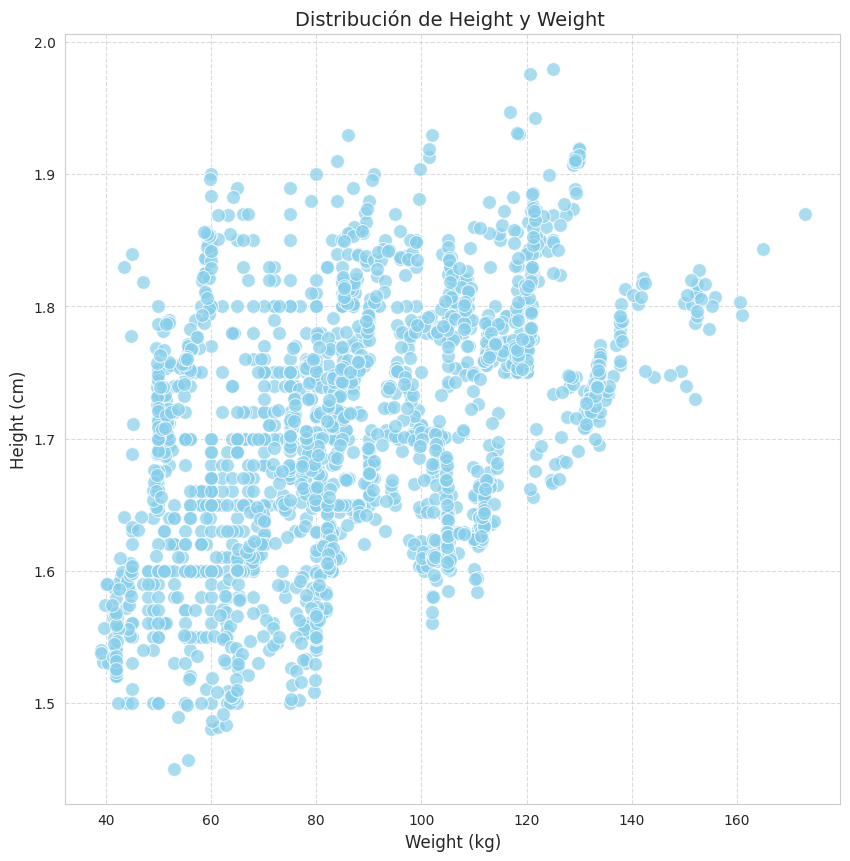

In [12]:
plt.figure(figsize=(10, 10))
sns.set_style("whitegrid")
sns.scatterplot(x="Weight", y="Height", data=df, color='skyblue', s=100, alpha=0.7)
plt.title("Distribución de Height y Weight ", fontsize=14)
plt.xlabel("Weight (kg)", fontsize=12)
plt.ylabel("Height (cm)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Quiero aclarar que para este gráfico me apoyé en gran medida (todo, jaja) en lo presentado en el siguiente [notebook](https://www.kaggle.com/code/keremkarayaz/obesity-analysis-and-accuracy-96?scriptVersionId=173547029&cellId=16). Me pareció muy interesante lo que pude visualizar en él, por lo tanto, decidí adoptarlo y usarlo.

**Conclusión del Gráfico**

Si observamos el gráfico, hay de todo un poco en cuanto a pesos y alturas. Esto significa que la gente en esta muestra es bastante variada, lo que está genial porque nos da una buena mezcla de características físicas.

Como es de sospechar, las personas más altas suelen pesar más. Pero, cómo están esparcidos los puntos, nos dice que hay más cosas que afectan cuánto pesa alguien, no solo su altura.

Si nos fijamos en la parte central del gráfico hay más puntos juntos, y vemos que la mayoría de la gente tiene un peso entre 60 y 80 kg y mide entre 1.6 y 1.8 metros.

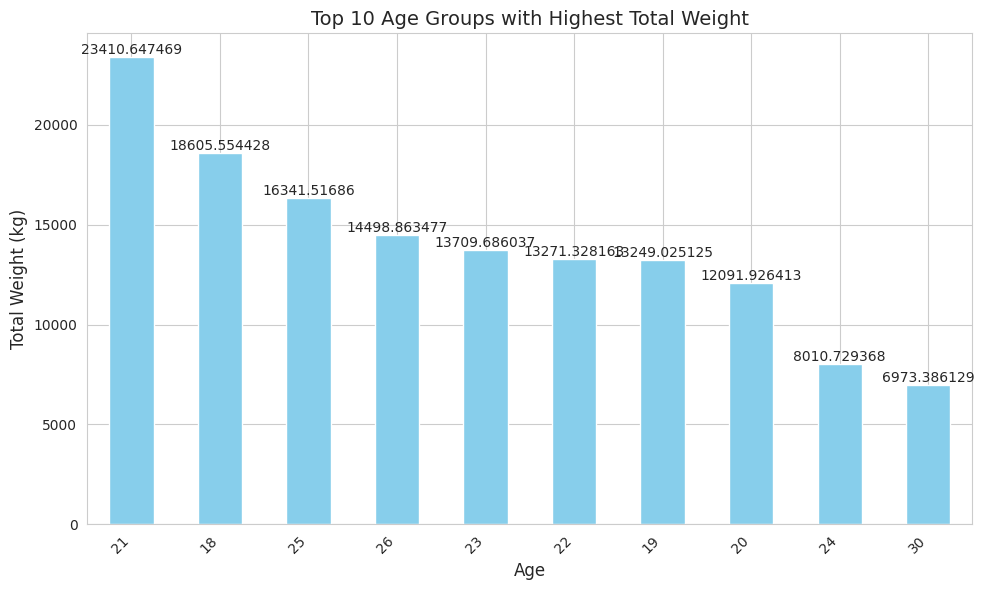

In [13]:
plt.figure(figsize=(10, 6))

df.groupby("Age")["Weight"].sum().sort_values(ascending=False).head(10).plot(kind="bar", color='skyblue')

plt.xlabel("Age", fontsize=12)
plt.ylabel("Total Weight (kg)", fontsize=12)
plt.title("Top 10 Age Groups with Highest Total Weight", fontsize=14)
plt.xticks(rotation=45, ha='right')

for i, v in enumerate(df.groupby("Age")["Weight"].sum().sort_values(ascending=False).head(10)):
    plt.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

Quiero aclarar que para este gráfico me apoyé en gran medida (todo, jaja) en lo presentado en el siguiente [notebook](https://www.kaggle.com/code/keremkarayaz/obesity-analysis-and-accuracy-96?scriptVersionId=173547029&cellId=14). Me pareció muy interesante lo que pude visualizar en él, por lo tanto, decidí adoptarlo y usarlo.

**Conclusión del Gráfico**

El grupo de personas de 21 años es el que más pesa en total. Parece que hay mucha gente de esa edad o que, en promedio, tienen más peso.

Los grupos de edad entre 18 y 26 años son los que más peso acumulan. Esto podría ser porque hay más personas de esas edades en el dataset o simplemente porque esos grupos tienen más peso en general.

Los de 24 y 30 años tienen el peso total más bajo entre los 10 grupos más pesados. Esto puede significar que hay menos personas de esas edades o que estas personas tienden a tener menos peso en comparación con los otros grupos destacados.

## Pregunta 3: Selección de columnas


#### Columnas a Utilizar:

**Gender**: Género del individuo (categórico).

**Age**: Edad del individuo (numérico).

**Height**: Altura del individuo en metros (numérico).

**Weight**: Peso del individuo en kilogramos (numérico).

**family_history_with_overweight**: Historial familiar de sobrepeso (categórico).

**FAVC**: Frecuencia del consumo de alimentos grasos (categórico).

**FCVC**: Frecuencia del consumo de vegetales (numérico).

**NCP**: Número de comidas principales al día (numérico).

**CAEC**: Consumo de alimentos entre comidas (categórico).

**CH2O**: Consumo diario de agua (numérico).

**FAF**: Frecuencia de actividad física por semana (numérico).

**TUE**: Tiempo de uso de dispositivos electrónicos por día (numérico).


#### Columnas a Eliminar:
1. **SCC**
2. **MTRANS**
3. **CALC**
4. **SMOKE**

#### Justificación:
- **SCC**: La decisión de eliminar esta columna se basa en la necesidad de simplificar el modelo. Monitorizar las calorías es un hábito que podría no ser consistente o suficientemente variado en la muestra de datos proporcionada, lo que hace que su contribución a la variabilidad del modelo sea limitada.
- **MTRANS**: Aunque podría ser un indicativo de niveles de actividad física, la gran mayoría de datos se concentran en 'Public_Transportation', lo que limita su variabilidad y relevancia. Las categorías con pocos datos como 'Motorbike' y 'Bike' no aportan suficiente información discriminante.
- **CALC**: La distribución desequilibrada de esta variable, con la mayoría de las respuestas en 'Sometimes' y muy pocas en 'Always', sugiere que no es un predictor robusto de la obesidad.
- **SMOKE**: Dada la abrumadora mayoría de participantes que no fuman, esta variable muestra una baja variabilidad que podría no aportar diferencia significativa en un modelo predictivo.

In [14]:
#Eliminación de columnas
df = df.drop(['SCC', 'MTRANS', 'CALC', 'SMOKE'], axis=1)

## Pregunta 4: Tratamiento de valores nulos


In [15]:
df.isnull().sum()

Age                               0
Gender                            0
Height                            0
Weight                            0
FAVC                              0
FCVC                              0
NCP                               0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
NObeyesdad                        0
BMI                               0
dtype: int64

**Este dataset no presenta valores nulos**

### Tratamiento de otras columnas en el dataset

In [16]:
numeric_columns = df.select_dtypes(exclude='object').columns
print(numeric_columns)
print('*'*100)
categorical_columns = df.select_dtypes(include='object').columns
print(categorical_columns)

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'BMI'], dtype='object')
****************************************************************************************************
Index(['Gender', 'FAVC', 'family_history_with_overweight', 'CAEC',
       'NObeyesdad'],
      dtype='object')


Quiero destacar que, para desarrollar esta sección, me basé en un interesante [notebook](https://www.kaggle.com/code/pavankumarmantha/eda-and-prediction-with-95-accuracy#Data-Preprocessing-and-Pipelining) del cual aprendí muchísimo. No sabía lo útil que podía ser utilizar pipelines para la estandarización y codificación del dataset, e incluso para el uso de PCA.

In [17]:
# Definir el pipeline para las características numéricas
numeric_features = Pipeline([
    ('scaling', StandardScaler(with_mean=True))
])

# Definir el pipeline para las características categóricas
categorical_features = Pipeline([
    ('encoding', OneHotEncoder())
])

# Definir el ColumnTransformer usando make_column_selector
processing = ColumnTransformer([
    ('numeric', numeric_features, make_column_selector(dtype_include='number')),
    ('categorical', categorical_features, make_column_selector(dtype_include='object'))
])

# Definir el pipeline que incluye el PCA
pca_pipeline = Pipeline([
    ('processing', processing),
    ('pca', PCA(n_components=2, random_state=12))
])

## Pregunta 5: Partición de datos


#### Selección de los features y el target

In [18]:
X =  df.drop(columns=['NObeyesdad'])
y = df['NObeyesdad']

#### División de los datos en conjuntos de entrenamiento y prueba

In [19]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Para dividir nuestro conjunto de datos en partes para entrenar y probar nuestros modelos, elegimos una división de 70/30. Esto significa que usamos el 70% de los datos para entrenar el modelo y el resto, el 30%, para probar qué tan bien funciona realmente. Esta es una forma bastante común de hacer las cosas porque te da suficiente información para que el modelo aprenda bien, pero también te deja con suficiente para probarlo de manera justa y ver cómo se desempeña con datos nuevos.

Para mantener las cosas consistentes cada vez que corremos el código, usamos algo llamado random_state. Esto es como fijar la lotería para que siempre te den los mismos números, lo que ayuda a comparar cambios y asegurarte de que cualquier mejora es por los ajustes que hiciste y no por casualidad.

Además, usamos algo llamado stratify, que básicamente asegura que nuestras muestras de entrenamiento y prueba reflejen las proporciones reales de las clases del conjunto completo de datos.

## Pregunta 6: Análisis con PCA


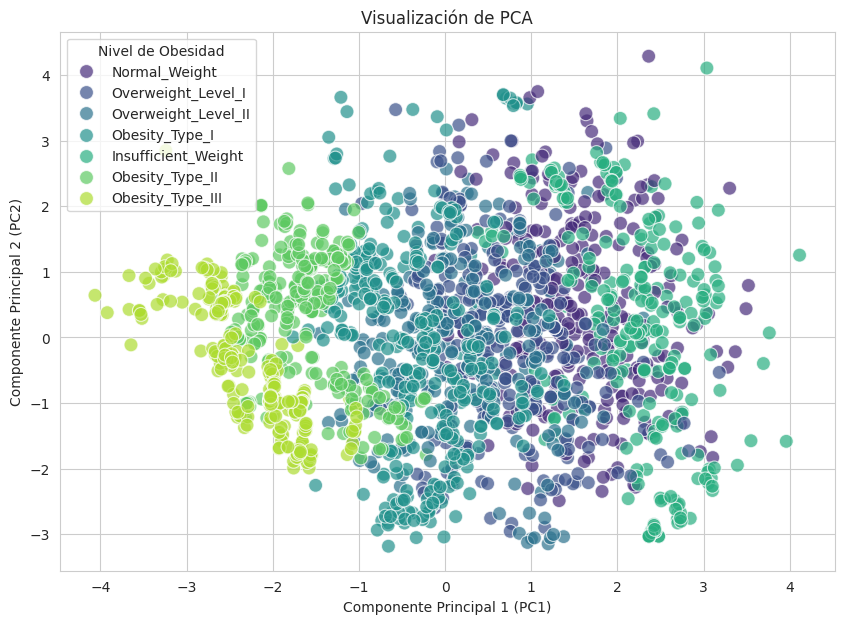

In [20]:
# Ajustar el pipeline y transformar los datos con PCA
X_pca = pca_pipeline.fit_transform(X)

# Convertir los datos transformados por PCA a un DataFrame para graficar
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['NObeyesdad'] = y.values

# Graficar los componentes principales utilizando seaborn
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='NObeyesdad', data=pca_df, palette='viridis', s=100, alpha=0.7)
plt.title('Visualización de PCA')
plt.xlabel('Componente Principal 1 (PC1)')
plt.ylabel('Componente Principal 2 (PC2)')
plt.legend(title='Nivel de Obesidad')
plt.show()


**Conclusión del Gráfico**

Aunque hay algunos grupos que parecen estar superpuestos, esto nos dice que, con las info que tenemos, no es fácil separar a la gente en diferentes niveles de obesidad solo con ver estas dos medidas principales.

Los que están en los extremos del gráfico, como los muy obesos o los de peso insuficiente, tienden a estar un poco más apartados que los demás. Esto podría sugerir que son bastante distintos en ciertas características comparados con el resto.

## Pregunta 7: Predicción con modelos de ML


### Entrenamiento de multiples modelos

Quiero hablar brevemente sobre el trabajo que he realizado aquí. Sé que en la tarea solo se solicitan dos modelos, pero realmente despertó mi curiosidad probar con más. Además, encontré una manera muy eficiente de hacerlo. Para ello, utilicé parte del código de este [notebook](https://www.kaggle.com/code/pavankumarmantha/eda-and-prediction-with-95-accuracy#Model-Preparation), y por supuesto, añadí algunas mejoras propias usando GridSearchCV para encontrar los mejores parámetros.


In [21]:
# Lista de algoritmos con sus parámetros para GridSearch
algorithms = [
    ('bagging classifier', BaggingClassifier(), {'modeling__n_estimators': [10, 50, 100]}),
    ('KNN classifier', KNeighborsClassifier(), {'modeling__n_neighbors': [3, 5, 7]}),
    ('Random Forest classifier', RandomForestClassifier(), {'modeling__n_estimators': [10, 50, 100], 'modeling__max_depth': [None, 10, 20]}),
    ('Adaboost classifier', AdaBoostClassifier(), {'modeling__n_estimators': [50, 100, 200]}),
    ('Gradient Boost classifier', GradientBoostingClassifier(), {'modeling__n_estimators': [50, 100, 150], 'modeling__learning_rate': [0.01, 0.1, 0.2]}),
    ('MLP', MLPClassifier(), {'modeling__alpha': [0.0001, 0.001, 0.01]})
]

trained_models = []
model_and_scores = {}

for name, model, params in algorithms:
    model_pipeline = Pipeline([
        ('processing', processing),
        ('modeling', model)
    ])
    # Usar GridSearchCV
    grid_search = GridSearchCV(model_pipeline, params, cv=3, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    best_score = grid_search.best_score_
    model_and_scores[name] = f"{best_score * 100:.2f}%"
    trained_models.append((name, best_model))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

### Accuracy de los modelos en el split de training

In [22]:
# Imprimir los resultados
for model_name, model_score in model_and_scores.items():
    print(f"Accuracy de modelo {model_name} en el split de training: {model_score}")

Accuracy de modelo bagging classifier en el split de training: 97.43%
Accuracy de modelo KNN classifier en el split de training: 80.77%
Accuracy de modelo Random Forest classifier en el split de training: 97.90%
Accuracy de modelo Adaboost classifier en el split de training: 52.14%
Accuracy de modelo Gradient Boost classifier en el split de training: 97.56%
Accuracy de modelo MLP en el split de training: 93.70%


In [23]:
def plot_confusion_matrix(y_true, y_pred, classes, ax, title='Confusion Matrix'):
    conf_matrix = confusion_matrix(y_true, y_pred, labels=classes)
    sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=classes, yticklabels=classes,cmap='Blues', ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_title(title)

### Accuracy de los modelos en el split de test

Quiero destacar que aprendí el uso de gráficos de matrices de confusión, entre otros temas, en el diplomado que realicé en la Pontificia Universidad Católica, dirigido por el Doctor Álvaro Soto, sobre inteligencia artificial.

Accuracy de modelo bagging classifier en el split de test: 97.95%
Accuracy de modelo KNN classifier en el split de test: 82.81%
Accuracy de modelo Random Forest classifier en el split de test: 97.48%
Accuracy de modelo Adaboost classifier en el split de test: 57.26%
Accuracy de modelo Gradient Boost classifier en el split de test: 97.00%
Accuracy de modelo MLP en el split de test: 93.85%


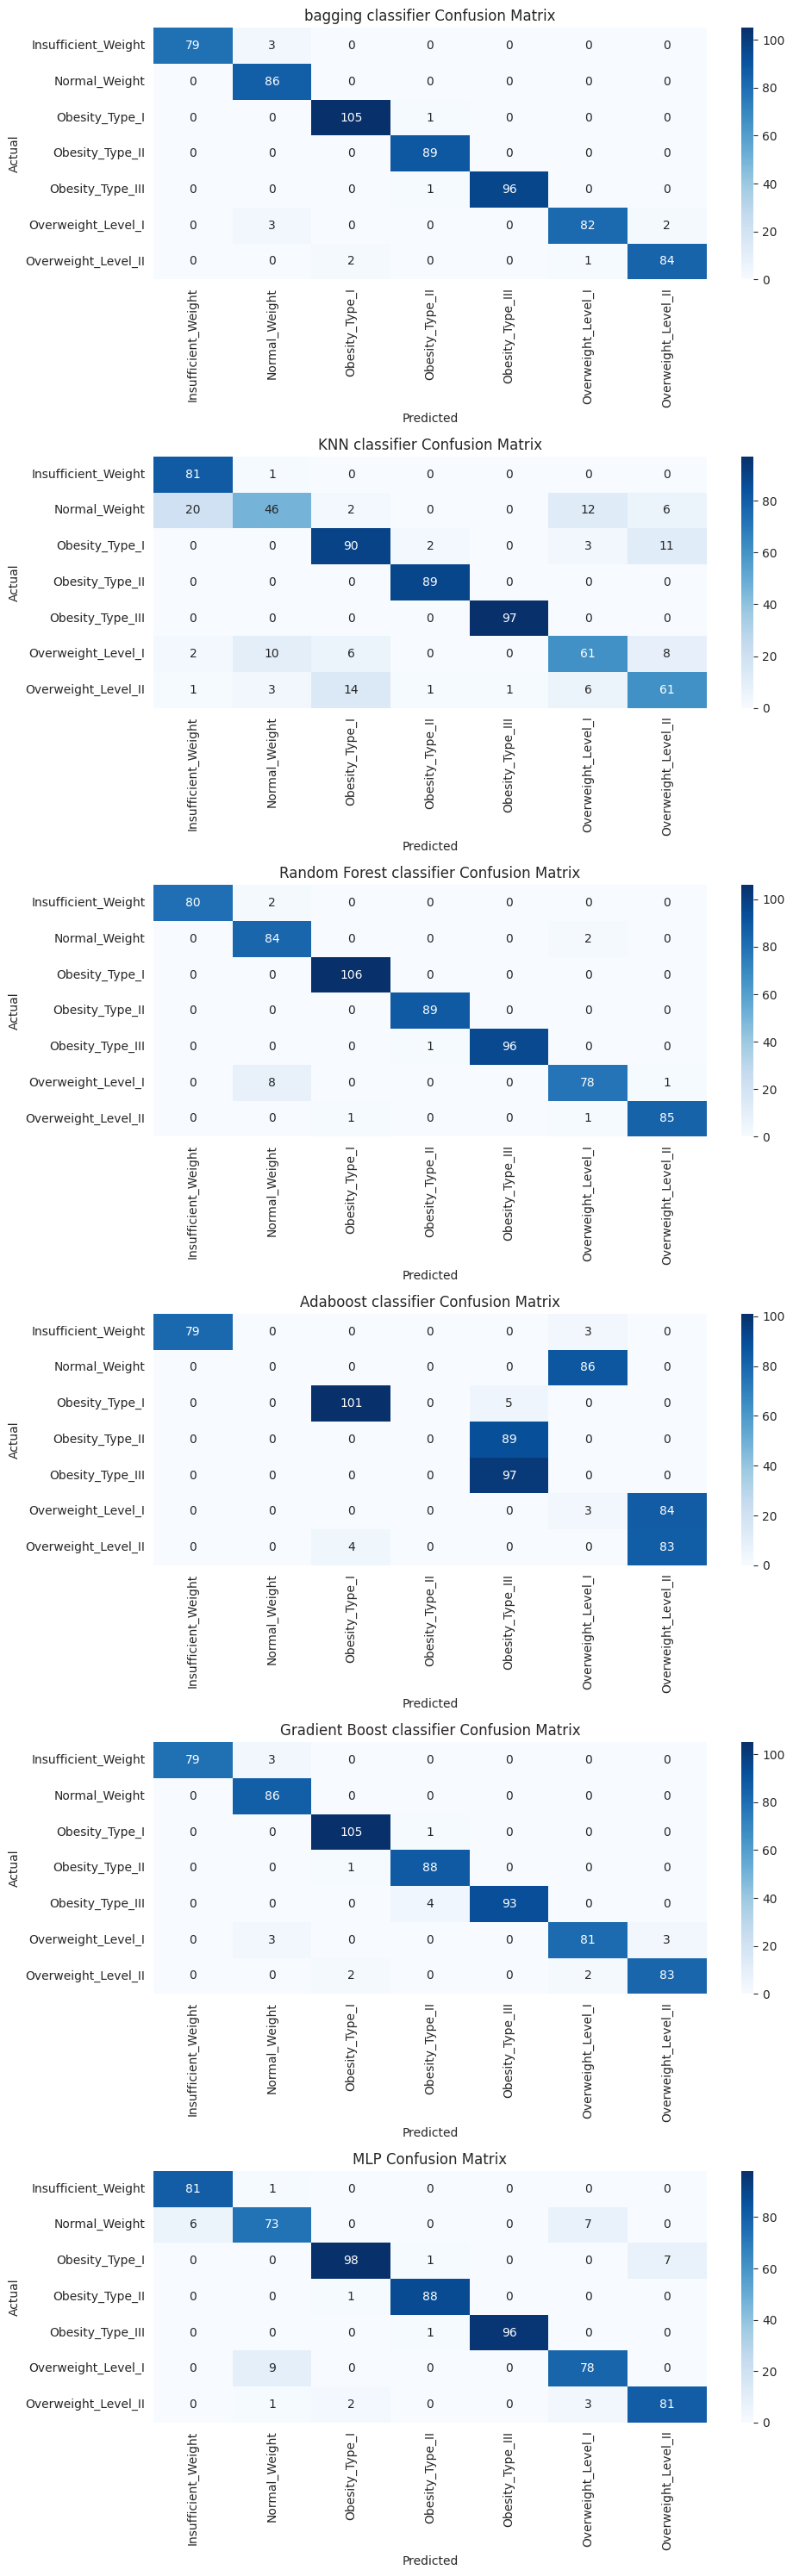

In [24]:
fig, axes = plt.subplots(nrows=len(trained_models), ncols=1, figsize=(10, 5 * len(trained_models)))
class_names = sorted(y_test.unique())

if len(trained_models) == 1:
    axes = [axes]  # Make it iterable

for (name, model), ax in zip(trained_models, axes):
    # Predice con el modelo
    y_pred = model.predict(X_test)

    # Calcula la precisión y muestra los resultados
    test_accuracy = model.score(X_test, y_test)
    print(f"Accuracy de modelo {name} en el split de test: {test_accuracy * 100:.2f}%")

    # Plotea la matriz de confusión
    plot_confusion_matrix(y_test, y_pred, class_names, ax=ax, title=f'{name} Confusion Matrix')

plt.tight_layout()
plt.show()

### Validación del DummyClassifier frente a mis modelos

In [25]:
dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [26]:
dummy_predictions = dummy_clf.predict(X_test)
dummy_accuracy = accuracy_score(y_test, dummy_predictions)
print("Dummy Classifier Accuracy: {:.2f}%".format(dummy_accuracy * 100))

Dummy Classifier Accuracy: 16.72%


In [27]:
my_prediction = trained_models[0][1].predict(X_test)

my_accuracy = accuracy_score(y_test, my_prediction)

print("My Model Accuracy: {:.2f}%".format(my_accuracy * 100))

My Model Accuracy: 97.95%


In [28]:
print("Reporte de clasificación de mi modelo:")
print(classification_report(y_test, my_prediction))

print("Reporte de clasificación de DummyClassifier")
print(classification_report(y_test, dummy_predictions))

Reporte de clasificación de mi modelo:
                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.96      0.98        82
      Normal_Weight       0.93      1.00      0.97        86
     Obesity_Type_I       0.98      0.99      0.99       106
    Obesity_Type_II       0.98      1.00      0.99        89
   Obesity_Type_III       1.00      0.99      0.99        97
 Overweight_Level_I       0.99      0.94      0.96        87
Overweight_Level_II       0.98      0.97      0.97        87

           accuracy                           0.98       634
          macro avg       0.98      0.98      0.98       634
       weighted avg       0.98      0.98      0.98       634

Reporte de clasificación de DummyClassifier
                     precision    recall  f1-score   support

Insufficient_Weight       0.00      0.00      0.00        82
      Normal_Weight       0.00      0.00      0.00        86
     Obesity_Type_I       0.17      1.00      0.29       10

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Pregunta 8: Sobreentrenamiento


Una vez más, sé que la tarea solo solicita un modelo, pero estos temas realmente me apasionan y quise profundizar un poco más en mis conocimientos. No tengo inconveniente si se me penaliza por esto; mi principal intención es aprovechar al máximo el diplomado en términos de aprendizaje. Por eso, decidí utilizar dos modelos. Me quedó bastante claro cómo puedo aumentar la complejidad del modelo con diferentes hiperparámetros. Por ejemplo, en RandomForest utilicé el parámetro max_depth, mientras que en el MLP se pueden emplear varios, como el alpha, que es un tipo de regularización que penaliza los pesos excesivamente altos. En realidad, este parámetro no complica el modelo per se, pero al usar alpha se puede observar una mejora si el modelo está bien ajustado. En este caso particular, opté por incrementar el número de capas ocultas. Desde mi experiencia en deep learning, área en la que he intentado especializarme, cuantas más capas ocultas tenga el modelo, más capaz será de realizar tareas complejas. Esto también incrementa la complejidad del modelo y debería hacer más evidente el sobreajuste si la tarea a predecir es sencilla. Esa fue la razón por la que elegí estos dos modelos.

### Sobreajuste RandomForestClassifier

In [29]:
max_depths = range(1, 51)
train_accuracies = []
test_accuracies = []

In [30]:
for depth in max_depths:
    model = Pipeline([
        ('processing', processing),
        ('modeling', RandomForestClassifier(max_depth=depth,  n_estimators=30, random_state=42))
    ])
    model.fit(X_train, y_train)
    # Predicciones y evaluación en el conjunto de entrenamiento
    train_pred = model.predict(X_train)
    train_accuracy = balanced_accuracy_score(y_train, train_pred)
    train_accuracies.append(train_accuracy)
    # Predicciones y evaluación en el conjunto de prueba
    test_pred = model.predict(X_test)
    test_accuracy = balanced_accuracy_score(y_test, test_pred)
    test_accuracies.append(test_accuracy)

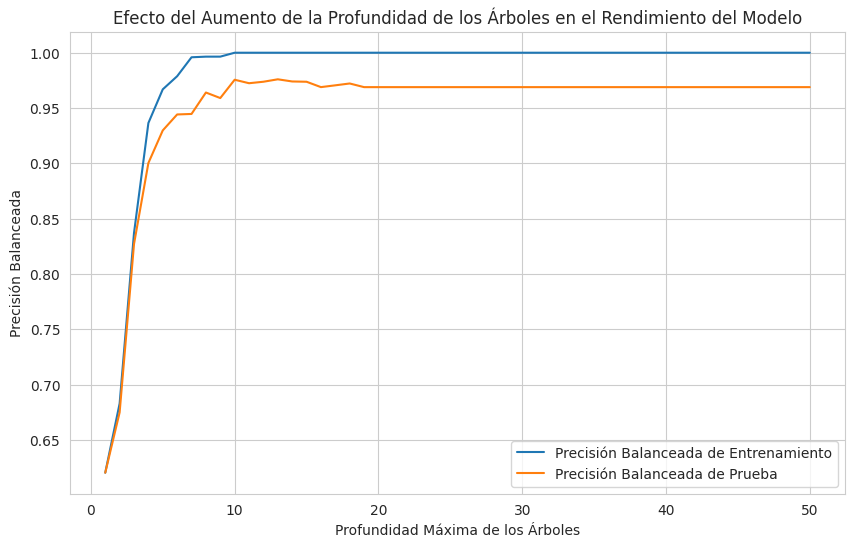

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_accuracies, label='Precisión Balanceada de Entrenamiento')
plt.plot(max_depths, test_accuracies, label='Precisión Balanceada de Prueba')
plt.xlabel('Profundidad Máxima de los Árboles')
plt.ylabel('Precisión Balanceada')
plt.title('Efecto del Aumento de la Profundidad de los Árboles en el Rendimiento del Modelo')
plt.legend()
plt.grid(True)
plt.show()


En este modelo, el sobreajuste no es claramente visible, a pesar del aumento significativo en la profundidad del árbol.

### Sobreajuste MLPClassifier

In [32]:
hidden_layer_configurations = [(10,), (50,), (100,), (10, 10), (50, 50), (100, 100)]
train_scores = []
test_scores = []
train_losses = []
test_losses = []

In [33]:
for config in hidden_layer_configurations:
    mlp = Pipeline([
        ('processing', processing),
        ('modeling', MLPClassifier(hidden_layer_sizes=config, random_state=1, max_iter=1000))
    ])
    mlp.fit(X_train, y_train)

    # Calcular las probabilidades en el conjunto de entrenamiento y prueba
    train_proba = mlp.predict_proba(X_train)
    test_proba = mlp.predict_proba(X_test)

    # Calcular la pérdida de entropía cruzada
    train_loss = log_loss(y_train, train_proba)
    test_loss = log_loss(y_test, test_proba)

    train_losses.append(train_loss)
    test_losses.append(test_loss)

    # Calcular la precisión balanceada (como antes)
    train_pred = mlp.predict(X_train)
    test_pred = mlp.predict(X_test)
    train_score = balanced_accuracy_score(y_train, train_pred)
    test_score = balanced_accuracy_score(y_test, test_pred)
    train_scores.append(train_score)
    test_scores.append(test_score)

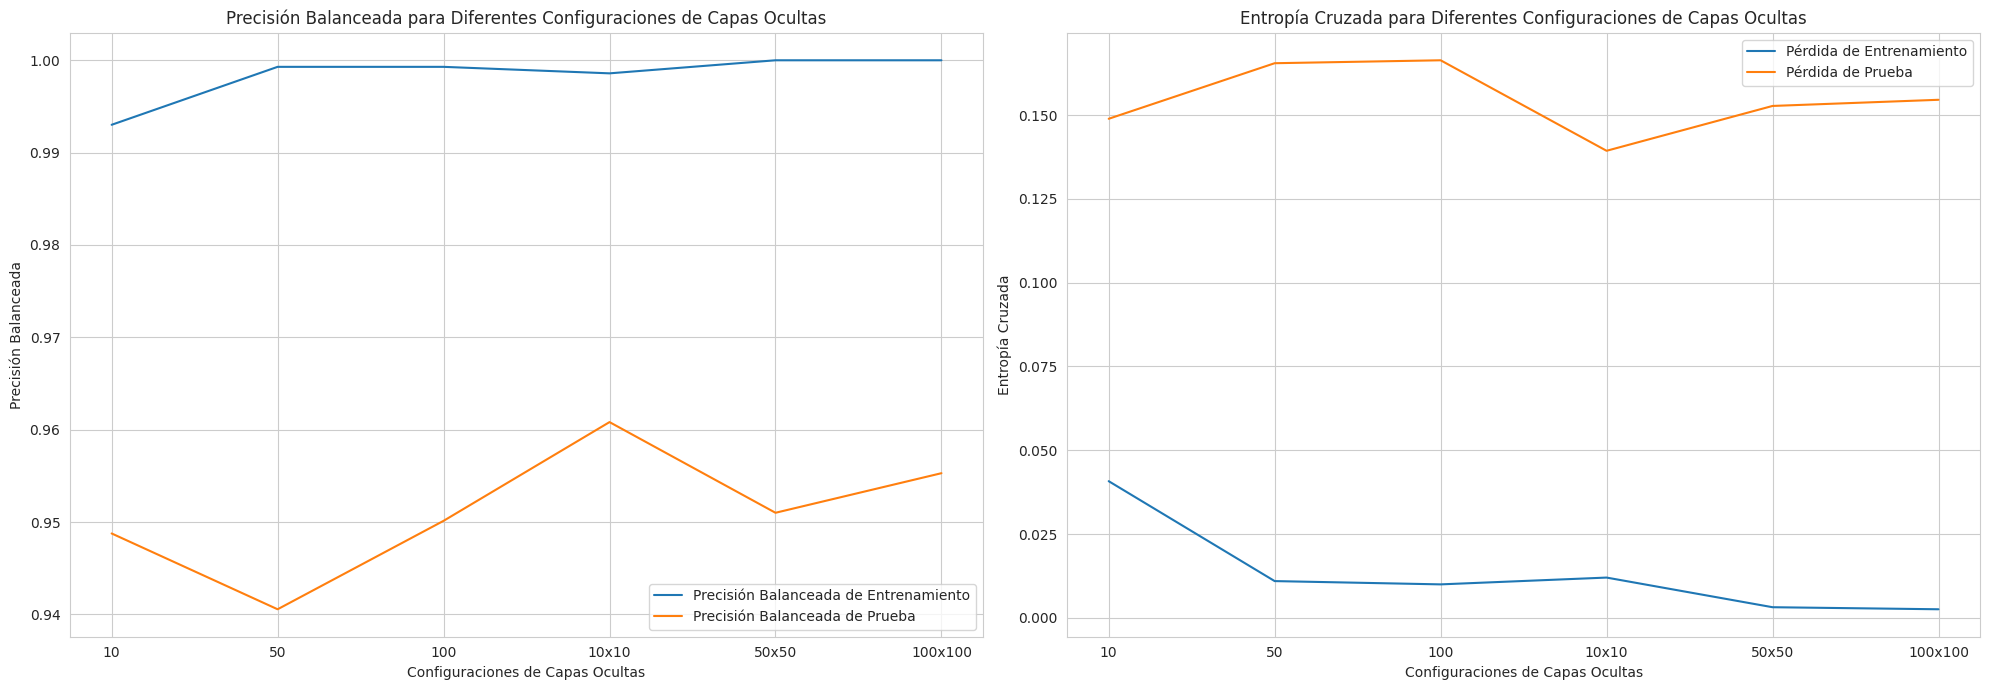

In [34]:
config_labels = ['10', '50', '100', '10x10', '50x50', '100x100']
# Graficar resultados
plt.figure(figsize=(20, 7))

# Subplot para la precisión balanceada
plt.subplot(1, 2, 1)
plt.plot(config_labels, train_scores, label='Precisión Balanceada de Entrenamiento')
plt.plot(config_labels, test_scores, label='Precisión Balanceada de Prueba')
plt.title('Precisión Balanceada para Diferentes Configuraciones de Capas Ocultas')
plt.xlabel('Configuraciones de Capas Ocultas')
plt.ylabel('Precisión Balanceada')
plt.legend()
plt.grid(True)

# Subplot para la entropía cruzada
plt.subplot(1, 2, 2)
plt.plot(config_labels, train_losses, label='Pérdida de Entrenamiento')
plt.plot(config_labels, test_losses, label='Pérdida de Prueba')
plt.title('Entropía Cruzada para Diferentes Configuraciones de Capas Ocultas')
plt.xlabel('Configuraciones de Capas Ocultas')
plt.ylabel('Entropía Cruzada')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

La imagen muestra que al aumentar las capas ocultas en la red neuronal hasta cierto punto (10x10 capas) la precisión mejora, pero añadir aún más capas (100x100 capas) hace que la precisión disminuya y la entropía cruzada en datos de prueba aumente. Esto indica sobreentrenamiento, es decir, el modelo se vuelve muy bueno con los datos de entrenamiento pero pierde capacidad para generalizar en datos nuevos. Esto ejemplifica cómo el aumento en complejidad (más capas ocultas) puede llevar al sobreentrenamiento.